@author: Valentin Larrieu

# Multi-armed bandits

The objective of this lab session is to test the performance of some usual bandit algorithms.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import random

## Algorithms

There are $k$ possible actions, $a \in \{ 0, 1,...,k - 1\}$. 

We consider the following algorithms:
* $\varepsilon$-greedy
* adaptive greedy
* UCB
* Thompson sampling

Each algorithm returns an action $a$ based on the following inputs:

| Variable   |      Type      |  Description |
|:---|:---|:---|
| `nb_tries` |  1D array of int of size `k` | number of tries of each action so far |
| `cum_rewards` |    1D array of float of size `k`    |   cumulative reward of each action so far |
| `t` | integer (optional) |    current time |
| `param` | mixed |    parameter of the algorithm |

In [2]:
def eps_greedy(nb_tries, cum_rewards, param):
    if param == None:
        eps = 0.1
    else:
        eps = float(param)
    k = np.shape(nb_tries)[0]
    if np.sum(nb_tries) == 0 or np.random.random() < eps:
        return np.random.randint(k)
    else:
        index = np.where(nb_tries > 0)[0]
        return index[np.argmax(cum_rewards[index] / nb_tries[index])]

In [3]:
def adaptive_greedy(nb_tries, cum_rewards, param):
    if param == None:
        c = 1.
    else:
        c = float(param)
    k = np.shape(nb_tries)[0]
    t = np.sum(nb_tries)
    if np.sum(nb_tries) == 0 or np.random.random() < c / (c + t):
        return np.random.randint(k)
    else:
        index = np.where(nb_tries > 0)[0]
        return index[np.argmax(cum_rewards[index] / nb_tries[index])]

In [12]:
def ucb(nb_tries, cum_rewards, param):
    if param == None:
        c = 1. 
    else:
        c = float(param)
    # to be completed  
    k = np.shape(nb_tries)[0]
    t = np.sum(nb_tries)
    if np.min(nb_tries) == 0:
        return np.random.choice(np.where(nb_tries == 0)[0])
    else:
        index = np.where(nb_tries > 0)[0]
        #return np.argmax(cum_rewards[index] / nb_tries[index]) + c * (np.sqrt(np.log(t)/nb_tries[index]))
        return index[np.argmax(cum_rewards[index] / nb_tries[index] + c * (np.sqrt(np.log(t)/nb_tries[index])))]
    # to be completed
    return 0

In [5]:
def thompson(nb_tries, cum_rewards, param):
    k = np.shape(nb_tries)[0]
    if param == "beta":
        # Beta prior
        try:
            samples = np.random.beta(cum_rewards + 1, nb_tries - cum_rewards + 1)
        except:
            samples = np.random.random(k)
    else:
        # Normal prior
        samples = np.random.normal(cum_rewards / (nb_tries + 1), 1. / (nb_tries + 1))
    return np.argmax(samples)

In [6]:
def get_action(algo, nb_tries, cum_rewards, param = None):
    if algo == "eps_greedy":
        return eps_greedy(nb_tries, cum_rewards, param)
    elif algo == "adaptive_greedy":
        return adaptive_greedy(nb_tries, cum_rewards, param)
    elif algo == "ucb":
        return ucb(nb_tries, cum_rewards, param)
    elif algo == "thompson":
        return thompson(nb_tries, cum_rewards, param)

In [7]:
def get_bernoulli_reward(a, model_param):
    return float(np.random.random() < model_param[a])

In [23]:
def simple_test(algo, model_param = [0.1, 0.6, 0.3], time_horizon = 20, param = None):
    k = len(model_param)
    nb_tries = np.zeros(k, int)
    cum_rewards = np.zeros(k, float)
    #print ("action -> reward")
    for t in range(time_horizon):
        a = get_action(algo, nb_tries, cum_rewards, param)
        r = get_bernoulli_reward(a, model_param)
        #print(str(a) + " -> " + str(int(r)))
        nb_tries[a] += 1
        cum_rewards[a] += r
    index = np.where(nb_tries > 0)[0]
    best_action = index[np.argmax(cum_rewards[index] / nb_tries[index])]
    #print("Best action (estimation) = ", best_action)
    #print("Average reward of this action = ", cum_rewards[best_action] / nb_tries[best_action])
    re = cum_rewards[best_action] / nb_tries[best_action]
    precision = 1/ time_horizon * nb_tries[1]
    return precision

In [9]:
algos = ["eps_greedy", "adaptive_greedy", "ucb", "thompson"]

In [24]:
#algo = algos[0]
nbiter = 100
for algo in algos:
    print("\n\n Algo : ", algo)
    sumv = 0
    for ite in range (nbiter):
        val = simple_test(algo)
        sumv = sumv + val
    print("Avg score = " ,sumv / nbiter)
    




 Algo :  eps_greedy
Avg score =  0.3929999999999999


 Algo :  adaptive_greedy
Avg score =  0.5025


 Algo :  ucb
Avg score =  0.5500000000000003


 Algo :  thompson
Avg score =  0.601


## Regret and precision

We now compare the performance of the algorithms in terms of **regret** and **precision**.

We consider two models: Bernoulli rewards and normal rewards. 

In [25]:
def get_reward(a, model, model_param):
    if model == "bernoulli":
        return float(np.random.random() < model_param[a])
    elif model == "normal":
        return np.random.normal(*model_param[a])

In [26]:
def simulate(model, model_param, time_horizon, algo, param = None):
    k = len(model_param)
    nb_tries = np.zeros(k, int)
    cum_rewards = np.zeros(k, float)
    action_seq = []
    reward_seq = []
    for t in range(time_horizon):
        a = get_action(algo, nb_tries, cum_rewards, param)
        r = get_reward(a, model, model_param)
        nb_tries[a] += 1
        cum_rewards[a] += r
        action_seq.append(a)
        reward_seq.append(r)
    return action_seq, reward_seq

In [27]:
# Bernoulli rewards
model = "bernoulli"
model_param = [0.1, 0.6, 0.3]
time_horizon = 20
algo = algos[1]
action_seq, reward_seq = simulate(model, model_param, time_horizon, algo)
print(action_seq)
print(reward_seq)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]


In [28]:
# Normal rewards
model = "normal"
model_param = [(2,1), (2.5,1)]
action_seq, reward_seq = simulate(model, model_param, time_horizon, algo)
print(action_seq)
print(reward_seq)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[2.889533406374649, 2.3746584730751854, 3.8653705796052673, 2.057169265294183, 2.2284161147256816, 2.0315118160053487, 0.5183593057659015, 1.6595086357986437, 2.3617833288529906, 2.3043299757672955, 4.677691052136277, 2.2708475909686614, 2.57753842348656, 3.198994026590038, 3.8374181345538263, 2.299743267662287, 2.4709298197416953, 3.6954624264862237, 1.8862191978130354, 0.8211241236500617]


In [29]:
def get_best_action(model, model_param):
    if model == "bernoulli":
        best_reward = np.max(model_param)
        best_actions = list(np.where(model_param == best_reward)[0])
    elif model == "normal":
        means = [params[a][0] for a in range(len(model_param))]
        best_reward = np.max(model_param)
        best_actions = list(np.where(means == best_reward)[0])
    return best_actions, best_reward

In [59]:
def get_metrics(action_seq, reward_seq, best_actions, best_reward):
    time_horizon = len(action_seq)
    regret = np.zeros(time_horizon, float)
    precision = np.zeros(time_horizon, float)
    
    #Init
    regret[0] = best_reward - reward_seq[0]
    precision[0] = int(action_seq[0] == best_actions[0])
    
    for t in range(1, time_horizon) :
        regret[t] = best_reward -reward_seq[t] + regret[t-1]
        precision[t] = ((t-1) * precision[t-1] + int(action_seq[t] == best_actions[0])) / t
        
    return regret, precision

In [60]:
def show_metrics(metrics):
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12, 4))
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Regret')
    ax1.plot(range(time_horizon),metrics[0], color = 'b')
    ax2.set_xlabel('Time')
    ax2.set_ylabel('Precision')
    ax2.set_ylim(-0.02,1.02)
    ax2.plot(range(time_horizon),metrics[1], color = 'b')
    plt.show()

In [61]:
time_horizon = 10000
model = "bernoulli"
model_param = [0.2, 0.5]



 Algo :  eps_greedy


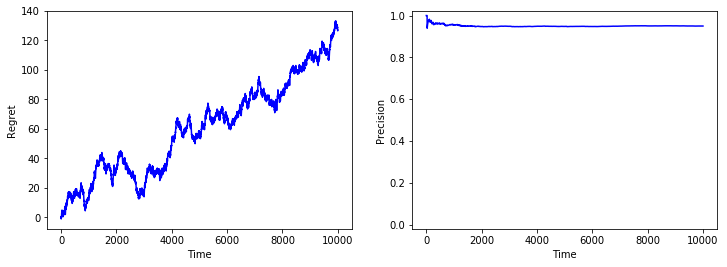



 Algo :  adaptive_greedy


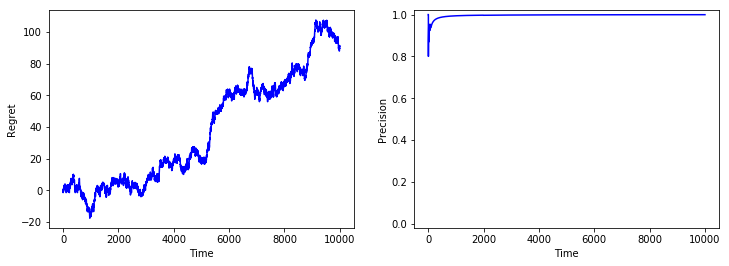



 Algo :  ucb


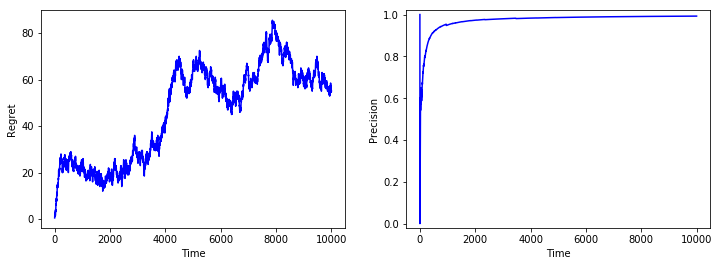



 Algo :  thompson


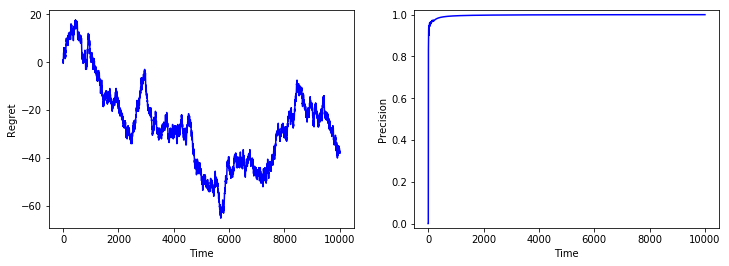

In [65]:
algo = algos[1]
for algo in algos:
    print("\n\n Algo : ", algo)
    results = simulate(model, model_param, time_horizon,  algo)
    metrics = get_metrics(*results, *get_best_action(model, model_param))
    show_metrics(metrics)

## Statistics

Finally, we provide some statistics on the performance of each algorithm for different time horizons.


In [66]:
def get_stats(nb_samples, time_periods, model, model_param, algo, param = None):
    time_horizon = max(time_periods)
    norm_regret_samples = [[] for t in time_periods]
    precision_samples = [[] for t in time_periods]
    for s in range(nb_samples):
        results = simulate(model, model_param, time_horizon, algo, param)
        regret, precision = get_metrics(*results, *get_best_action(model, model_param))
        for i,t in enumerate(time_periods):
            norm_regret_samples[i].append(regret[t - 1] / t)
            precision_samples[i].append(precision[t - 1])
    return norm_regret_samples, precision_samples

In [67]:
def show_stats(time_periods, stats):
    meanprops = dict(marker='o', markeredgecolor='black', markerfacecolor='r')
    medianprops = dict(linestyle='-', linewidth=2.5, color = 'b')
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12, 4))
    ax1.boxplot(stats[0], positions = range(len(time_periods)), showfliers = False, showmeans = True, meanprops = meanprops, medianprops = medianprops)
    ax1.axhline(linestyle = '--', color = 'r')
    ax1.set_xticklabels(time_periods)
    ax1.set_xlabel('Time horizon')
    ax1.set_ylabel('Normalized regret')
    ax2.boxplot(stats[1], positions = range(len(time_periods)), showfliers = False, showmeans = True, meanprops = meanprops, medianprops = medianprops)
    ax2.set_ylim(-0.02,1.02)
    ax2.axhline(y = 1, linestyle = '--', color = 'r')
    ax2.set_xticklabels(time_periods)
    ax2.set_xlabel('Time horizon')
    ax2.set_ylabel('Precision')
    plt.show()

In [68]:
time_periods = [100,1000,5000]
nb_samples = 100
model = "bernoulli"
model_param = [0.1, 0.2]
algo = algos[3]
stats = get_stats(nb_samples, time_periods, model, model_param, algo)

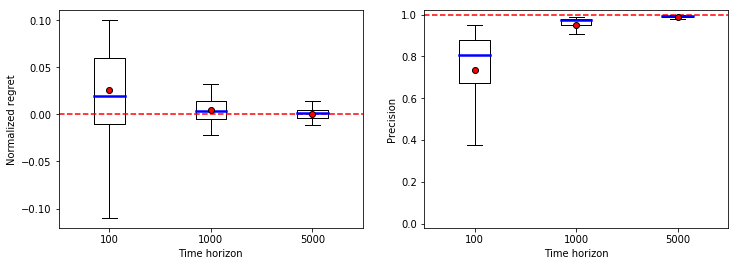

In [69]:
show_stats(time_periods, stats)